# Python pour la Data Science

## 2) Les dataframes Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Les données du Titanic
data=pd.read_excel('titanic3.xls')

In [31]:
data.head() # Les premières lignes du dataframe, très utile pour voir sa forme

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [32]:
data.shape

(1309, 14)

In [33]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [34]:
data.describe() # Les premières statistiques

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [35]:
# On élimine quelques colonnes
data=data.drop([ 'name',  'sibsp', 'parch', 'ticket','fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],axis=1)

In [36]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [37]:
data.describe() # pas de stats sur les colonnes non numériques

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [38]:
# On remarque qu'il y a des données manquantes (quelques âges par exemple)
data.dropna(axis=0,inplace=True) # on elève les lignes contenant des données manquantes
#fillna permet de compléter par une valeur par défaut (souvent on utilise la moyenne)
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [39]:
data.shape

(1046, 4)

In [40]:
# quelques statistiques
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

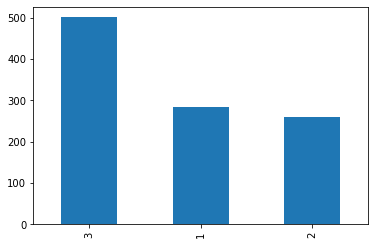

In [41]:
data['pclass'].value_counts().plot.bar()
plt.show()

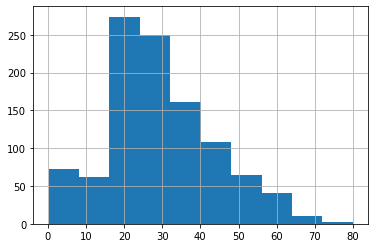

In [42]:
data['age'].hist()
plt.show()

In [43]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [44]:
data.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [45]:
# Un dataframe peut être vu comme un dictionnaire de séries de données dont les clés sont les noms des colonnes
a=data['age']

In [46]:
type(a) # Les series sont des tableaux numpy indexés

pandas.core.series.Series

In [47]:
a.head()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

In [48]:
#slicing
data['age'][0:20]

0     29.0000
1      0.9167
2      2.0000
3     30.0000
4     25.0000
5     48.0000
6     63.0000
7     39.0000
8     53.0000
9     71.0000
10    47.0000
11    18.0000
12    24.0000
13    26.0000
14    80.0000
16    24.0000
17    50.0000
18    32.0000
19    36.0000
20    37.0000
Name: age, dtype: float64

In [49]:
# création d'un masque booléen
mask = data['age'] < 18

In [50]:
mask.head()

0    False
1     True
2     True
3    False
4    False
Name: age, dtype: bool

In [51]:
# que l'on peut utiliser pour faire de la sélection de données
enfant = data[data['age'] < 18]

In [52]:
enfant.head()

,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
53,1,0,male,17.0000
54,1,1,male,11.0000
55,1,1,female,14.0000


In [53]:
# Ca se complique...
enfant['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [54]:
enfant['survived'].value_counts()

1    81
0    73
Name: survived, dtype: int64

In [55]:
enfant.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [56]:
# indexing
data.iloc[10,2]

'male'

In [57]:
data.iloc[0:10,2]

0    female
1      male
2    female
3      male
4    female
5      male
6    female
7      male
8    female
9      male
Name: sex, dtype: object

In [58]:
data.iloc[0:10,0:2]

,pclass,survived
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0
5,1,1
6,1,1
7,1,0
8,1,1
9,1,0


In [59]:
data.loc[0:10,'age']

0     29.0000
1      0.9167
2      2.0000
3     30.0000
4     25.0000
5     48.0000
6     63.0000
7     39.0000
8     53.0000
9     71.0000
10    47.0000
Name: age, dtype: float64

In [60]:
data.loc[0:10,['age','sex']]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female
3,30.0000,male
4,25.0000,female
5,48.0000,male
6,63.0000,female
7,39.0000,male
8,53.0000,female
9,71.0000,male
